## _Computer Vision_
### Lab 4, _Frequency Filters_.
#### >> Topics  :
* ##### Skeleton
* ##### Filtering In Frequency Domain

##### >> Note  :
> ##### to close image windows smoothly please **press Esc** on your keyboard, **don't close** it directly by clicking on 'X' to avoid kernel interruption.
> - ##### To run this lab using google colab follow below instructions:
> 1. Import `cv2_imshow` method using `from google.colab.patches import cv2_imshow`.
> 2. Replace all `cv.imshow()` with `cv2_imshow()` with one parameter **name of that image**.
> 3. Specify your path.

In [65]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


### Section 0, _Helper Functions_:
> ##### This cell contains some helper function such as error_handler, please run it without any modification.

In [66]:
# please don't modify this code.
def show_text_window(titles):
    black = np.zeros((len(titles) * 150, 400))
    for idx, t in enumerate(titles):
        place = idx + 1
        cv.putText(black, t, (10, place * 100),
                   cv.FONT_HERSHEY_SIMPLEX, 1, (200, 0, 200), 1, 2)
    cv.imshow("Values", black)


def get_updated_value(key, value, **kwargs):
    if key == ord('+'):
        return value, 0
    elif key == ord('-'):
        return -value, 0
    elif key == ord('*'):
        return 0, kwargs.get('value2', value)
    elif key == ord('/'):
        return 0, -kwargs.get('value2', value)
    elif key == 27:
        raise Exception('Terminated by user!')
    else:
        return 0, 0


def error_handler(func):
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs)
        except Exception as ex:
            cv.destroyAllWindows()
            print(f'{ex}')

    return wrapper


### Section 1, _Skeleton_:
* ##### The boundary of an object is set on fire and the skeleton is the place where the fire meet each other.
* ##### It's known as a thinning or medial axis of an object, which is the set of all points having more than one closest point on the object's boundary.
* ##### Skeleton is a representation of the essential structure or shape of an object within an image.
* ##### Skeletons are used to simplify the representation of objects in images.
* ##### Skeletons could be used for purposes such as optical character recognition, fingerprint recognition, and human pose estimation.
![image info](https://www.researchgate.net/profile/Frederic-Chazal/publication/226022599/figure/fig3/AS:667655438618641@1536192869690/Examples-of-medial-axes.png)

* ##### There are many algorithms to find objects' skeletons. It could be done using erosion, which removes pixels from the object boundaries, gradually eroding it until a skeleton-like structure remains.
* ##### The cross structure is used to preserve the connectivity and elongated shape of objects.


In [67]:
@error_handler
def skeleton(path):
    img = cv.imread(path, 0)
    ret, img = cv.threshold(img, 127, 255, 0)
    skel = np.zeros(img.shape, np.uint8)

    element = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
    print(element)

    while True:
        eroded = cv.erode(img, element)
        opened = cv.dilate(eroded, element)

        img_except_opening = img - opened
        skel = skel | img_except_opening

        cv.imshow("Skeleton", skel)
        cv.imshow("Original Image", img)
        cv.imshow("Opened", opened)
        cv.imshow("Image Except Opening", img_except_opening)

        img = eroded.copy()
        k = cv.waitKey(0)

        # press "esc" to terminate all windows or wait till the end
        if cv.countNonZero(img) == 0 or k == 27:
            cv.destroyAllWindows()
            break


path = "../Images/horse.png"
skeleton(path)


[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [68]:
path = "../Images/shapes.png"
skeleton(path)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


### Section 2, _Filtering In Frequency Domain_:
> ##### It is used to manipulate and enhance images by applying various filters and operations in the frequency domain. It involves transforming an image from the spatial domain to the frequency domain, performing operations in this domain, and then returning the result to the spatial domain.

#### 2.1 Fourier Transform
* ##### A mathematical technique that decomposes an image into its constituent frequencies.
* ##### It represents the image in terms of its sinusoidal components.
* ##### The result of the 2D Fourier Transform (FT) is complex function (complex numbers).
* ##### In order to create a visual representation of the 2D Fourier Transform (FT), we calculate the magnitude of each complex number. However, since the resulting magnitudes can be very large, we take the logarithm of these values.
* ##### But the output of the FT is typically arranged such that the zero-frequency component is located at the left corner (0, 0). So we shift the spectrum so that the zero-frequency component is at the center.
* ##### To better understand of FT, click to watch this [video](https://youtu.be/spUNpyF58BY?si=K-Ucon-urQNujRl1).
![image info](https://miro.medium.com/v2/resize:fit:1358/1*w1mcpi8gCgQI4FrqWFJ2GA.png)
* ##### To compute the Fourier transform, Fast Fourier Transform (FFT) algorithm is used, reducing the computational complexity from O(N^2) to O(N log N) for an N x N image.
* ##### To better understand of FFT, click to watch this [video](https://youtu.be/h7apO7q16V0?si=OvsOf-JIG6ooJCy9).
* ##### click too see numpy documentation for: [np.fft.fft2()](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html), [np.log1p()](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [np.fft.fftshift()](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)

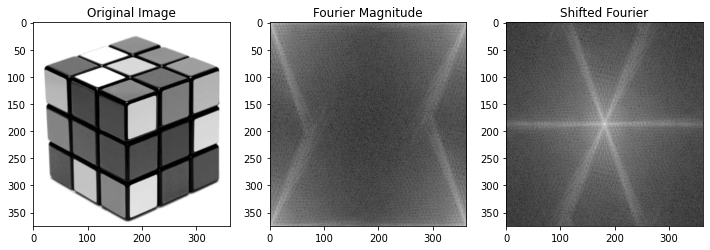

In [69]:
def norm_mag(img):
    log_mag = np.log1p(np.abs(img))
    return (log_mag * 255 / log_mag.max()).astype(np.uint8)


def plot_image(ax, img, title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)


@error_handler
def ft(path):
    img = cv.imread(path, 0)
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))

    # Original Image
    plot_image(axs[0], img, 'Original Image')

    # Fourier Transform
    F = np.fft.fft2(img)
    plot_image(axs[1], norm_mag(F), 'Fourier Magnitude')

    # Shifted Fourier Transform
    Fshift = np.fft.fftshift(F)
    plot_image(axs[2], norm_mag(Fshift), 'Shifted Fourier')
    return img, Fshift


path = '../Images/rubik.png'
img, Fshift = ft(path)


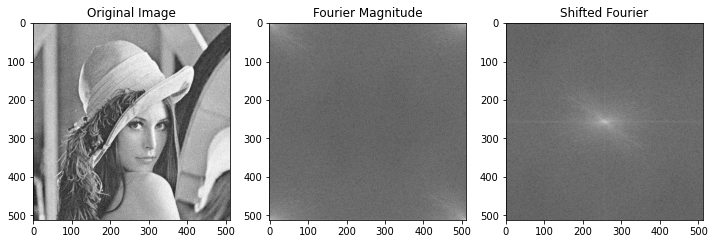

In [70]:
path = '../Images/Lenna-noisy.jpg'
img, Fshift = ft(path)

#### 2.2 Low-Pass Filtering
* ##### Low-Pass filters are used to smooth or blur image, reduce noise, and enhance the low-frequency details.
* ##### Applying a strong low-pass filter may result in a loss of fine details and textures
* ##### click too see numpy documentation for: [np.fft.ifft2()](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html),  [np.fft.ifftshift()](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html)

In [71]:
@error_handler
def apply_filter_in_freq_domain(img, Fshift, D0=50, type='low'):
    while True:
        cv.imshow("Shifted Fourier", norm_mag(Fshift))

        # Create Mask
        circle = cv.getStructuringElement(cv.MORPH_ELLIPSE, (D0, D0))
        M, N = img.shape
        center_h, center_w = M // 2, N // 2
        h_r = D0 // 2

        if type == 'low':
            mask = np.zeros((M, N))
            mask[center_h - h_r:center_h + h_r, center_w - h_r:center_w + h_r] = circle.copy()
        elif type == 'high':
            mask = np.ones((M, N))
            mask[center_h - h_r:center_h + h_r, center_w -
                 h_r:center_w + h_r] = 1 - circle.copy()

        cv.imshow("Mask", mask)


        # Apply Filter
        filtered_Fshift = mask * Fshift

        # Un-shift Filtered Image
        filtered_F = np.fft.ifftshift(filtered_Fshift)
        cv.imshow("Shifted Filtered Fourier", norm_mag(np.fft.fftshift(filtered_F)))

        # Inverse Fourier Transform
        result = np.abs(np.fft.ifft2(filtered_F))
        cv.imshow("Result", result / np.float32(255))

        show_text_window([f'Kernel Size {D0, D0}'])
        key = cv.waitKey(0)
        dD0, _ = get_updated_value(key, 2)
        D0 += dD0


apply_filter_in_freq_domain(img, Fshift, D0=50, type='low')


Terminated by user!


#### 2.3 High-Pass Filtering
* ##### High-Pass filters are applied to an image to emphasize edges, fine details, and other high-frequency features.
* #####  Frequencies above the cutoff are passed, while those below are reduced.


In [72]:
# high pass filtering
apply_filter_in_freq_domain(img, Fshift, D0=50, type='high')

Terminated by user!


## _The End_.